In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
import symreg
from gpbenchmarks import get_data

from experiment_settings import nguyen7_funset, pagie_funset, keijzer_funset, korns12_funset, vlad_funset


In [2]:
import pygmo as pg

In [12]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        x = np.clip(x, self.bounds[0], self.bounds[1])
        
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        return self.bounds

In [42]:
kw_params = {'real_valued': True, 'max_back': 20}

params_nguyen7 = tengp.Parameters(2, 1, 1, 50, nguyen7_funset, **kw_params)
params_pagie1  = tengp.Parameters(2, 1, 1, 50, pagie_funset, **kw_params)
params_keijzer6 = tengp.Parameters(2, 1, 1, 50, keijzer_funset, **kw_params)
params_korns = tengp.Parameters(6, 1, 1, 50, korns12_funset, **kw_params)
params_vlad = tengp.Parameters(6, 1, 1, 50, vlad_funset, **kw_params)

In [43]:
import random 

data = [
    ('nguyen7', symreg.get_benchmark_nguyen7(random, None), params_nguyen7),
    ('pagie1', symreg.get_benchmark_pagie1(random, None), params_pagie1),
    ('keijzer6', symreg.get_benchmark_keijzer(random, 6), params_keijzer6),
    ('korns12', symreg.get_benchmark_korns(random, 12), params_korns),
    ('vladislasleva4', symreg.get_benchmark_vladislasleva4(random, None), params_vlad)
]

In [48]:
%%time
results = []
champions = []


for name, (x_train, y_train, x_test, y_test), params in data[1:2]:
    print(name)
    bounds = tengp.individual.IndividualBuilder(params).create().bounds[:]
    
    prob = pg.problem(cost_function(np.c_[x_train, np.ones(len(x_train))], y_train, params, bounds))
    
    problem_results = []
    #pg.set_global_rng_seed(42)
    for i in range(1):
        print(i, end=',')
        algo = pg.algorithm(pg.pso(gen=200, max_vel=0.25))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        champions.append(pop.champion_x)
    results.append(problem_results)

pagie1
0,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:35: RuntimeWarning: invalid value encountered in sqrt
  return  np.sqrt(x)
/mnt/c/Users/jarinov-notas/dev/cgp-optimization-experiment/experiment_settings.py:11: RuntimeWarning: invalid value encountered in greater
  return np.log(x, out=np.copy(x), where=x>0)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in power
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: overflow encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in power
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:104: RuntimeWarning: invalid value encountered in add
  return l + u
/mnt/c/Use

CPU times: user 24.4 s, sys: 62.5 ms, total: 24.4 s
Wall time: 25.7 s


In [28]:
results

[[10000000000.0]]

In [19]:
def plot_results(name, outs):
    print(name)
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    plt.figure()
    plt.title(name)
    sns.distplot(costs, kde=False);
    

nguyen7
min: 0.6037258951653853
mean: 0.6037258951653853
median: 0.6037258951653853
variance: 0.0
pagie1
min: 10000000000.0
mean: 10000000000.0
median: 10000000000.0
variance: 0.0
keijzer6
min: 0.022568639230670418
mean: 0.022568639230670418
median: 0.022568639230670418
variance: 0.0
korns12
min: 10000000000.0
mean: 10000000000.0
median: 10000000000.0
variance: 0.0
vladislasleva4
min: 10000000000.0
mean: 10000000000.0
median: 10000000000.0
variance: 0.0


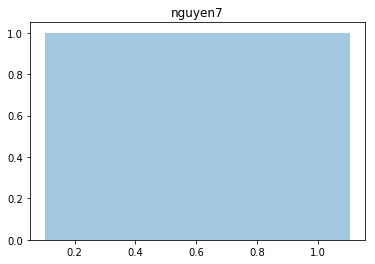

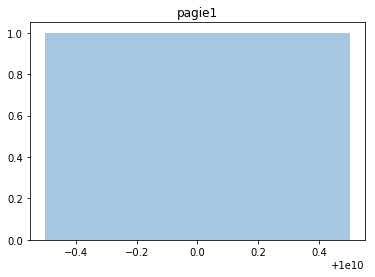

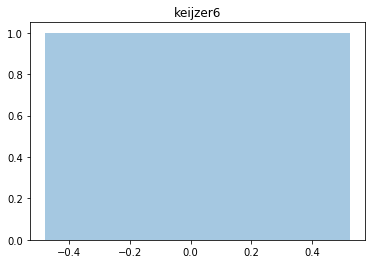

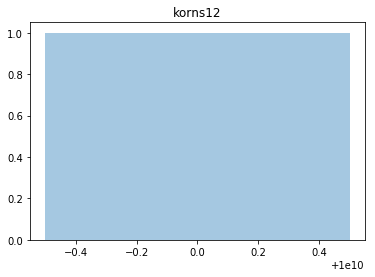

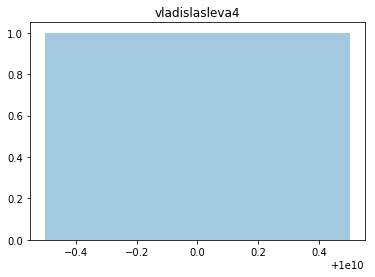

In [20]:
for d, result in zip(data, results):
    plot_results(d[0], result)